# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
now = datetime.datetime.now()

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"We have found {len(cities)} cities to analyze")

We have found 618 cities to analyze


## Perform API Calls

In [3]:
#Creating base URL and empty dataframe
url = f"https://api.openweathermap.org/data/2.5/weather?APPID={api_key}&units=imperial&q="
weather_df = pd.DataFrame({"City":[],
                        "Country":[],
                        "Cloudiness":[],
                        "Date":[],
                        "Humidity":[],
                        "Lat":[],
                        "Lng":[],
                        "Max_temp":[],
                        "Wind_speed":[]
                       })
        

In [4]:
#API request for each city and populating dataframe in the same loop
i = 0
for city in cities:    
    response_req = requests.get(url+city)
    response = response_req.json()

    if (response["cod"] == 200):
        i = i+1
        print(f"Processing Record {i} | {city}")
        print(response_req.url)

        weather_df.loc[i,"City"] = city
        weather_df.loc[i,"Country"] = response["sys"]["country"]
        weather_df.loc[i,"Cloudiness"] = response["clouds"]["all"]
        weather_df.loc[i,"Date"] = now.strftime("%Y-%m-%d") 
        weather_df.loc[i,"Humidity"] = response["main"]["humidity"]
        weather_df.loc[i,"Lat"] = response["coord"]["lat"]
        weather_df.loc[i,"Lng"] = response["coord"]["lon"]
        weather_df.loc[i,"Max_temp"] = response["main"]["temp_max"]
        weather_df.loc[i,"Wind_speed"] = response["wind"]["speed"]
    else:
        print("City not found. Skipping")
            
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

City not found. Skipping
Processing Record 1 | east london
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=east%20london
Processing Record 2 | punta arenas
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=punta%20arenas
Processing Record 3 | cherskiy
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=cherskiy
City not found. Skipping
Processing Record 4 | busselton
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=busselton
Processing Record 5 | komatipoort
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=komatipoort
Processing Record 6 | xuddur
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=xuddur
Processing Record 7 | harper
https://api.openweathermap.org/data

Processing Record 56 | grindavik
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=grindavik
Processing Record 57 | sulzbach-rosenberg
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=sulzbach-rosenberg
Processing Record 58 | ilulissat
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=ilulissat
Processing Record 59 | los llanos de aridane
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=los%20llanos%20de%20aridane
Processing Record 60 | coruripe
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=coruripe
Processing Record 61 | ulaangom
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=ulaangom
City not found. Skipping
Processing Record 62 | cockburn town
https://api.

Processing Record 111 | bambous virieux
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=bambous%20virieux
Processing Record 112 | souillac
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=souillac
Processing Record 113 | banda aceh
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=banda%20aceh
Processing Record 114 | haines junction
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=haines%20junction
Processing Record 115 | nome
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=nome
Processing Record 116 | ghanzi
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=ghanzi
Processing Record 117 | padang
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda0485

Processing Record 166 | durban
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=durban
Processing Record 167 | bukama
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=bukama
City not found. Skipping
Processing Record 168 | ixtapa
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=ixtapa
Processing Record 169 | kokkola
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=kokkola
Processing Record 170 | talnakh
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=talnakh
Processing Record 171 | san quintin
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=san%20quintin
Processing Record 172 | qaqortoq
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e4

Processing Record 221 | celestun
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=celestun
Processing Record 222 | taseyevo
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=taseyevo
Processing Record 223 | rampura
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=rampura
Processing Record 224 | yangambi
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=yangambi
Processing Record 225 | kedrovyy
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=kedrovyy
Processing Record 226 | esperance
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=esperance
Processing Record 227 | cabedelo
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&unit

Processing Record 277 | ipixuna
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=ipixuna
Processing Record 278 | yongchang
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=yongchang
Processing Record 279 | ocho rios
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=ocho%20rios
Processing Record 280 | flinders
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=flinders
Processing Record 281 | strunino
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=strunino
Processing Record 282 | poronaysk
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=poronaysk
Processing Record 283 | grand gaube
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e

Processing Record 332 | varhaug
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=varhaug
Processing Record 333 | tiksi
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=tiksi
Processing Record 334 | batemans bay
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=batemans%20bay
Processing Record 335 | guerrero negro
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=guerrero%20negro
Processing Record 336 | bilibino
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=bilibino
Processing Record 337 | vilhena
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=vilhena
Processing Record 338 | tsiroanomandidy
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda0485694

Processing Record 387 | esqueda
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=esqueda
Processing Record 388 | zalesovo
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=zalesovo
Processing Record 389 | kailua
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=kailua
Processing Record 390 | college
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=college
Processing Record 391 | grenaa
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=grenaa
Processing Record 392 | dinghai
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=dinghai
Processing Record 393 | motril
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=mot

Processing Record 442 | zamora
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=zamora
Processing Record 443 | tupiza
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=tupiza
City not found. Skipping
Processing Record 444 | vestmannaeyjar
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=vestmannaeyjar
City not found. Skipping
Processing Record 445 | dubbo
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=dubbo
Processing Record 446 | sovetskiy
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=sovetskiy
Processing Record 447 | dalbandin
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=dalbandin
Processing Record 448 | high level
https://api.openweathermap.org/data/2

Processing Record 498 | kipushi
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=kipushi
Processing Record 499 | borogontsy
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=borogontsy
Processing Record 500 | ewo
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=ewo
Processing Record 501 | makakilo city
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=makakilo%20city
Processing Record 502 | thunder bay
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=thunder%20bay
Processing Record 503 | siverek
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03e5591&units=imperial&q=siverek
Processing Record 504 | gazanjyk
https://api.openweathermap.org/data/2.5/weather?APPID=924783bda048569443e49dd6a03

In [5]:
weather_df.to_csv("weather_data.csv")
weather_df.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max_temp,Wind_speed
1,east london,ZA,88.0,2018-11-26,100.0,-33.02,27.91,69.78,13.00
2,punta arenas,CL,40.0,2018-11-26,50.0,-53.16,-70.91,55.40,26.40
3,cherskiy,RU,20.0,2018-11-26,52.0,68.75,161.30,-30.62,2.71
4,busselton,AU,0.0,2018-11-26,100.0,-33.64,115.35,52.50,13.22
5,komatipoort,MZ,8.0,2018-11-26,54.0,-25.43,31.96,81.52,9.98


## Latitude vs Temperature Plot

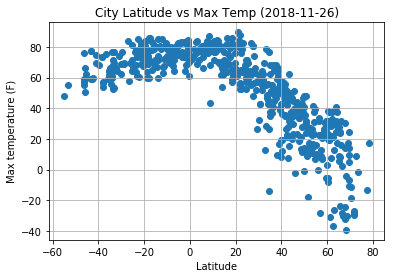

In [6]:
# Build scatter plot for latitude vs temperature
plt.figure()
plt.scatter(weather_df["Lat"],weather_df["Max_temp"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max temperature (F)")
plt.title(f"City Latitude vs Max Temp ({weather_df.iloc[0]['Date']})")

# Save the figure
plt.savefig("Lat&Temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

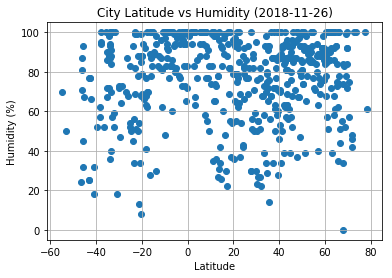

In [7]:
# Build the scatter plots for each city types
plt.figure()
plt.scatter(weather_df["Lat"],weather_df["Humidity"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({weather_df.iloc[0]['Date']})")

# Save the figure
plt.savefig("Lat&Hum.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

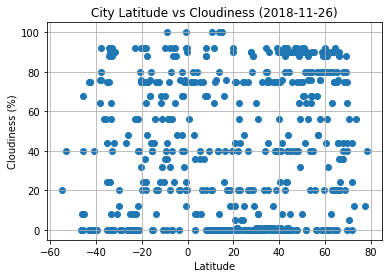

In [8]:
# Build the scatter plots for each city types
plt.figure()
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({weather_df.iloc[0]['Date']})")

# Save the figure
plt.savefig("Lat&Cloud.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

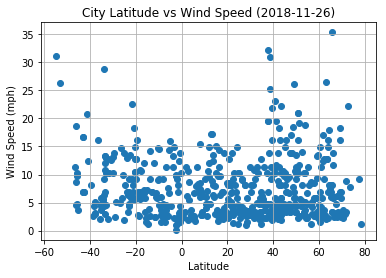

In [9]:
# Build the scatter plots for each city types
plt.figure()
plt.scatter(weather_df["Lat"],weather_df["Wind_speed"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({weather_df.iloc[0]['Date']})")

# Save the figure
plt.savefig("Lat&Wind.png")

# Show plot
plt.show()